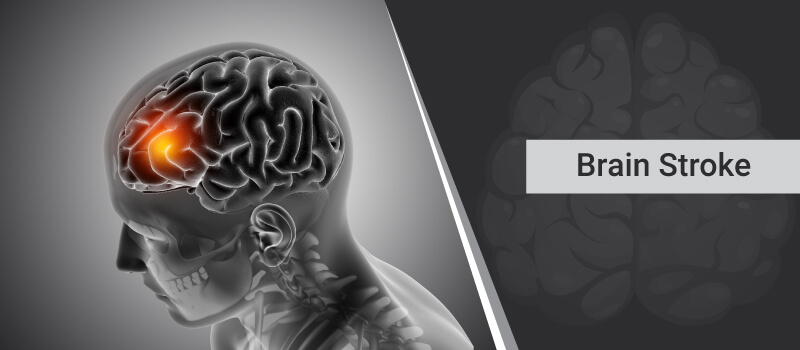

🧠 In this notebook i will try to predict stroke condition and using oversampling as a way to fix the dataset imbalance

# import Required libraries

In [61]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

# Some information of dataset 
1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

5) ever-married: "No" or "Yes"

6) worktype: "children", "Govt_jov", "Neverworked", "Private" or "Self-employed" 7) Residencetype: "Rural" or "Urban"

8) avgglucoselevel: average glucose level in blood

9) bmi: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1 if the patient had a stroke or 0 if not

# Upload the Dataset

In [62]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Lets fill Null Values

In [64]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [65]:
data["bmi"].fillna(data["bmi"].mean(),inplace=True)
data.isnull().sum().sum()

0

In [66]:
data.shape

(5110, 12)

In [67]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# More informations to Understand More about Dataset

In [68]:
data["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [69]:
pd.crosstab(data['smoking_status'],data['stroke'],margins=True).style.background_gradient(cmap='YlGn')

stroke,0,1,All
smoking_status,,,
Unknown,1497,47,1544
formerly smoked,815,70,885
never smoked,1802,90,1892
smokes,747,42,789
All,4861,249,5110


In [70]:
pd.crosstab(data["Residence_type"],data['stroke'],margins=True).style.background_gradient(cmap='YlGnBu')

stroke,0,1,All
Residence_type,,,
Rural,2400,114,2514
Urban,2461,135,2596
All,4861,249,5110


In [71]:
pd.crosstab(data["ever_married"],data['stroke'],margins=True).style.background_gradient(cmap='YlGnBu')

stroke,0,1,All
ever_married,,,
No,1728,29,1757
Yes,3133,220,3353
All,4861,249,5110


In [72]:
pd.crosstab(data["work_type"],data['stroke'],margins=True).style.background_gradient(cmap='YlGnBu')

stroke,0,1,All
work_type,,,
Govt_job,624,33,657
Never_worked,22,0,22
Private,2776,149,2925
Self-employed,754,65,819
children,685,2,687
All,4861,249,5110


In [73]:
pd.crosstab(data["hypertension"],data['stroke'],margins=True).style.background_gradient(cmap='YlGnBu')

stroke,0,1,All
hypertension,,,
0,4429,183,4612
1,432,66,498
All,4861,249,5110


In [74]:
pd.crosstab(data["heart_disease"],data['stroke'],margins=True).style.background_gradient(cmap='YlGnBu')

stroke,0,1,All
heart_disease,,,
0,4632,202,4834
1,229,47,276
All,4861,249,5110


In [75]:
pd.crosstab(data["gender"],data['stroke'],margins=True).style.background_gradient(cmap='YlGnBu')

stroke,0,1,All
gender,,,
Female,2853,141,2994
Male,2007,108,2115
Other,1,0,1
All,4861,249,5110


#I dropped "other" category 

In [76]:
data[data['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [77]:
data = data.drop(data[data['gender']=='Other'].index)

In [78]:
# The id column is not relevant ,also will dropped
data.drop(columns=['id'],inplace=True) 
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


 # Data Visualization

In [79]:
px.pie(names = data['stroke'],width =400, height = 400, title="Values of Stroke - No-stroke")

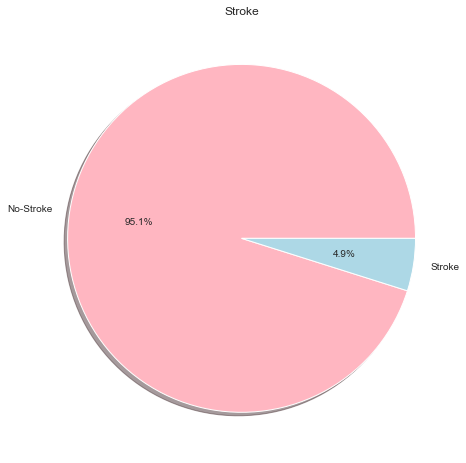

In [80]:
plt.subplots(figsize=(18,8))
labels = ['No-Stroke', 'Stroke']
colors = ['lightpink','lightBlue']
data['stroke'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels = labels, colors = colors)
plt.title('Stroke & No-Stroke')
plt.ylabel('')
plt.title('Stroke')
plt.show()

Stroke samples are only 4.87% of the total samples.

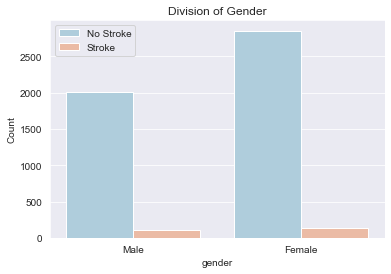

In [81]:
sns.countplot(x='gender', data= data, hue='stroke',palette='RdBu_r')
plt.title('Division of Gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(['No Stroke','Stroke'])
plt.show()

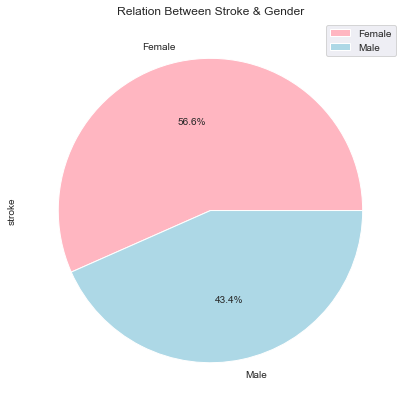

In [82]:
plt.figure(figsize=(10, 7))
labels = ['Female', 'Male']
colors = ['lightpink','lightBlue']
data.groupby(data['gender'])['stroke'].sum().plot(kind='pie',autopct='%1.1f%%', labels = labels, colors = colors)
plt.legend()
plt.title('Relation Between Stroke & Gender')
plt.show()

Females is more 

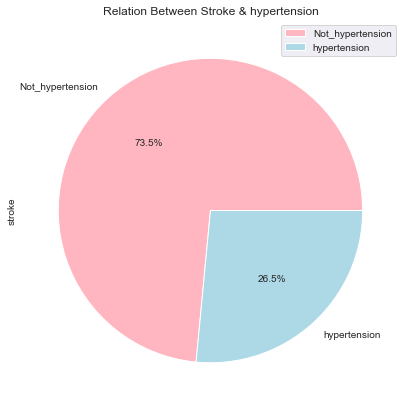

In [83]:
plt.figure(figsize=(10, 7))
labels = ['Not_hypertension', 'hypertension']
colors = ['lightpink','lightBlue']
data.groupby(data['hypertension'])['stroke'].sum().plot(kind='pie',autopct='%1.1f%%', labels = labels, colors = colors)
plt.legend()
plt.title('Relation Between Stroke & hypertension')
plt.show()

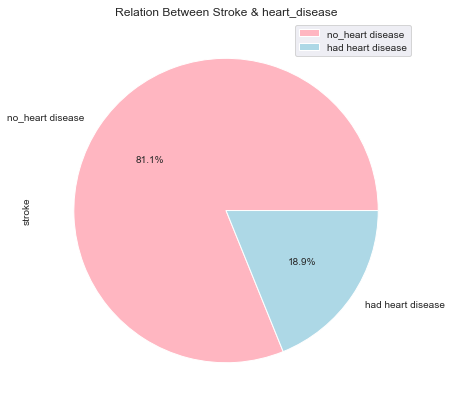

In [84]:
plt.figure(figsize=(10, 7))
labels = ['no_heart disease ', 'had heart disease']
colors = ['lightpink','lightBlue']
data.groupby(data['heart_disease'])['stroke'].sum().plot(kind='pie',autopct='%1.1f%%', labels = labels, colors = colors)
plt.legend()
plt.title('Relation Between Stroke & heart_disease')
plt.show()

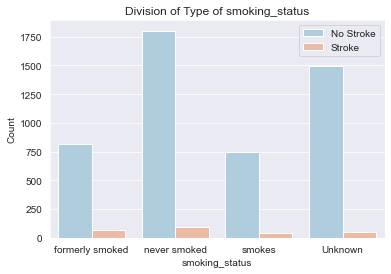

In [85]:
sns.countplot(x='smoking_status', data= data, hue='stroke',palette='RdBu_r')
plt.title('Division of Type of smoking_status')
plt.xlabel('smoking_status')
plt.ylabel('Count')
plt.legend(['No Stroke','Stroke'])
plt.show()

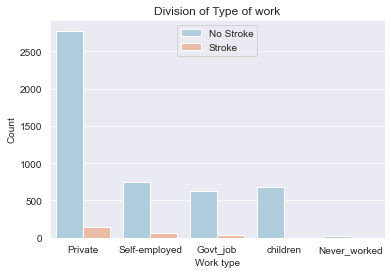

In [86]:
sns.countplot(x='work_type', data= data, hue='stroke',palette='RdBu_r')
plt.title('Division of Type of work')
plt.xlabel('Work type')
plt.ylabel('Count')
plt.legend(['No Stroke','Stroke'])
plt.show()

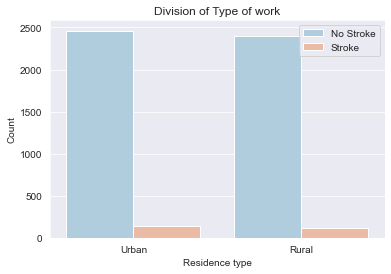

In [87]:
sns.countplot(x='Residence_type', data= data, hue='stroke',palette='RdBu_r')
plt.title('Division of Type of work')
plt.xlabel('Residence type')
plt.ylabel('Count')
plt.legend(['No Stroke','Stroke'])
plt.show()

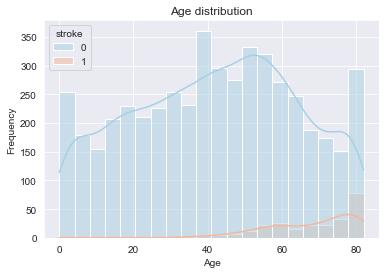

In [88]:
sns.histplot(data=data,x='age',kde=True,hue='stroke',palette='RdBu_r')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Note: 

Brain stroke seems to be an age related Approximatly 90% of the pateints aged more than 50 yrs.

# BMI categorical data
Note:

under 18.5 = underweight

between 18.5 and 24.9 = healthy

between 25 and 29.9 = overweight

between 30 and 39.9 = obese

above 39.9 = extreme obese

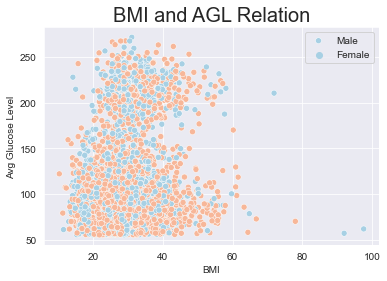

In [89]:
sns.scatterplot(x='bmi',y='avg_glucose_level',data=data,hue='gender',palette='RdBu_r')
plt.xlabel('BMI')
plt.ylabel('Avg Glucose Level')
plt.title('BMI and AGL Relation', fontsize=20)
plt.legend(['Male','Female'])
plt.show()

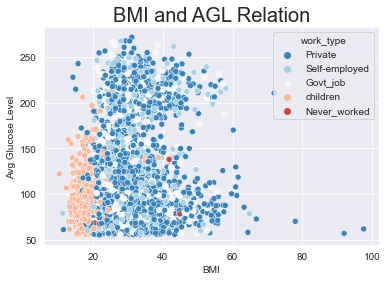

In [90]:
sns.scatterplot(x='bmi',y='avg_glucose_level',data=data,hue='work_type',palette= 'RdBu_r')
plt.xlabel('BMI')
plt.ylabel('Avg Glucose Level')
plt.title('BMI and AGL Relation', fontsize=20)
plt.show()

Note: Although BMI doen't calculate Body Fat, it is moderately correlated to it. So analysing from BMI is slightly different in children and female, but for the scope of the analysis, we consider it in the same page.

<Figure size 2000x1500 with 0 Axes>

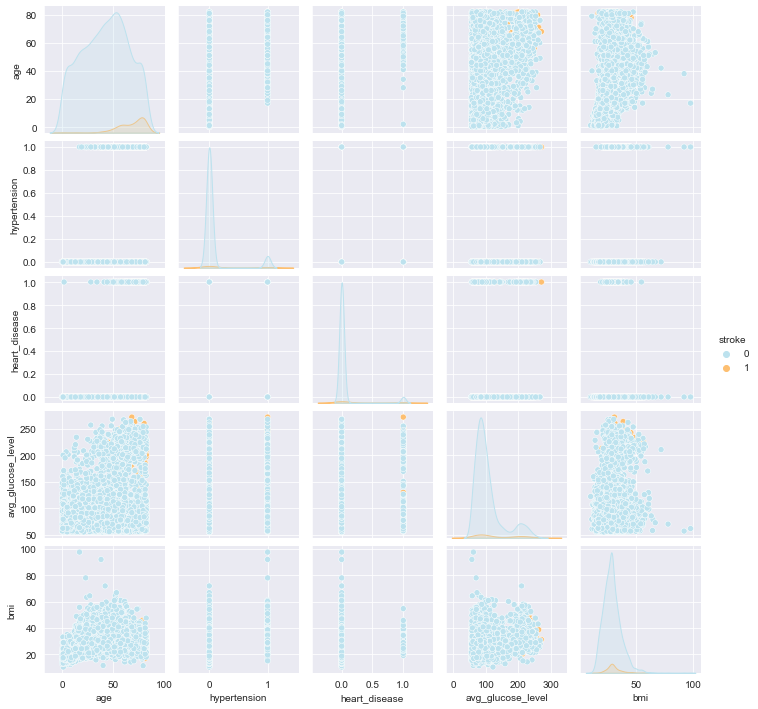

In [91]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=data,hue='stroke',height=2,palette='RdYlBu_r')
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

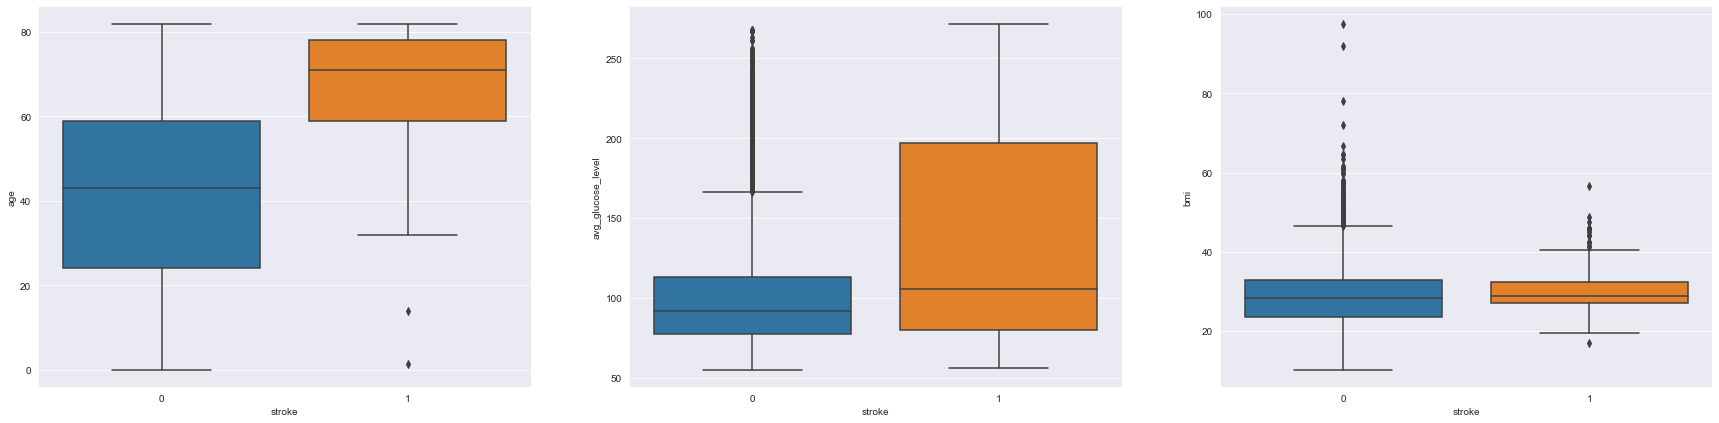

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(30,7))

sns.boxplot(data=data, x='stroke', y='age', ax=axes[0])

sns.boxplot(data=data, x='stroke', y='avg_glucose_level', ax=axes[1])

sns.boxplot(data=data, x='stroke', y='bmi', ax=axes[2])

 # Finding Correlation

In [93]:
correlation_hypertension = data['stroke'].corr(data['hypertension'])
print("\nCorrelation between stroke and hypertension is : ",round(correlation_hypertension,2))

correlation_heart_disease = data['stroke'].corr(data['heart_disease'])
print("\nCorrelation between stroke and heart_disease is : ",round(correlation_heart_disease,2))

correlation_age = data['stroke'].corr(data['age'])
print("\nCorrelation between stroke and age is : ",round(correlation_age,2))

correlation_avg_glucose_level = data['stroke'].corr(data['avg_glucose_level'])
print("\nCorrelation between stroke and avg_glucose_level is : ",round(correlation_avg_glucose_level,2))

correlation_bmi = data['stroke'].corr(data['bmi'])
print("\nCorrelation between stroke and bmi is : ",round(correlation_bmi,2))


Correlation between stroke and hypertension is :  0.13

Correlation between stroke and heart_disease is :  0.13

Correlation between stroke and age is :  0.25

Correlation between stroke and avg_glucose_level is :  0.13

Correlation between stroke and bmi is :  0.04


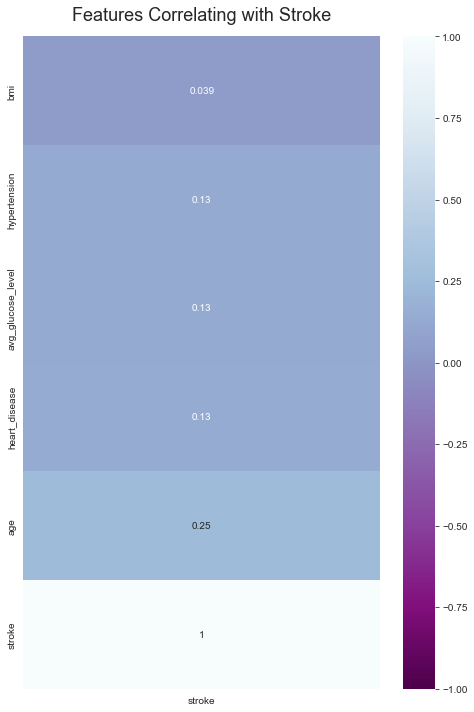

In [94]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['stroke']].sort_values(by='stroke'), vmin=-1, vmax=1, annot=True, cmap= 'BuPu_r')
heatmap.set_title('Features Correlating with Stroke', fontdict={'fontsize':18}, pad=16);

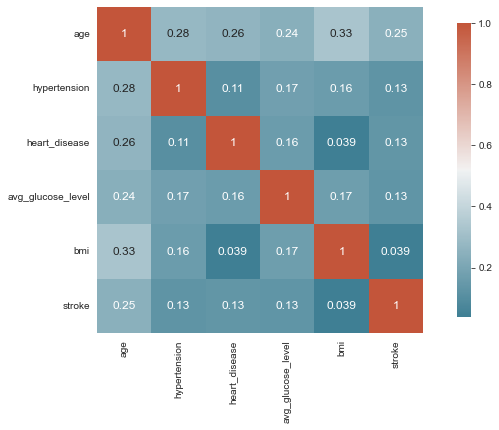

In [95]:
def plot_correlation_map( data ):
    corr = data.corr()
    s , ax = plt.subplots( figsize =( 12 , 6 ) )
    cmap = sns.diverging_palette( 221 ,20 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ "shrink" : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { "fontsize" : 12}
        ) 
plot_correlation_map(data)   

# Converting labels into binary

In [96]:
label_encoder = preprocessing.LabelEncoder()
data['gender']= label_encoder.fit_transform(data['gender']) 
data['ever_married']= label_encoder.fit_transform(data['ever_married'])
data['work_type']= label_encoder.fit_transform(data['work_type'])
data['Residence_type']= label_encoder.fit_transform(data['Residence_type'])
data['smoking_status']= label_encoder.fit_transform(data['smoking_status'])
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


# Scaling data
Scaling the data so that all the features become comparable.

Normalizing the data so that the data approximately.

follows a Gaussian distribution.

Converting the numpy array into a pandas DataFrame.

In [97]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
normalized = normalize(scaled)
normalized = pd.DataFrame(normalized)

In [98]:
normalized

,0,1,2,3,4,5,6,7,8,9,10
0,0.168898,0.149231,-0.046652,0.594031,0.102731,-0.021840,0.139669,0.384198,0.142104,-0.049943,0.627153
1,-0.158876,0.148556,-0.062122,-0.045173,0.136796,0.144292,-0.192125,0.401054,-0.000031,0.109908,0.835117
2,0.180739,0.247029,-0.049923,0.635675,0.109933,-0.023371,-0.154396,-0.000739,0.071154,0.088325,0.671119
3,-0.162226,0.049254,-0.063432,-0.046125,0.139680,-0.029696,0.189904,0.277453,0.138050,0.292357,0.852724
4,-0.137842,0.259444,0.499039,-0.039192,0.118685,0.125189,-0.166689,0.246217,-0.104283,0.095357,0.724553
...,...,...,...,...,...,...,...,...,...,...,...
5104,-0.218354,0.422472,0.790522,-0.062084,0.188008,-0.039970,0.255608,-0.128464,-0.000043,0.151054,-0.058805
5105,-0.290268,0.576887,-0.113498,-0.082531,0.249928,0.263624,0.339793,0.145369,0.498264,0.200803,-0.078172
5106,-0.428729,-0.185663,-0.167637,-0.121899,0.369147,0.389375,-0.518453,-0.260795,0.113020,0.296588,-0.115461
5107,0.511911,0.147849,-0.141397,-0.102818,0.311364,-0.066195,-0.437300,0.571537,-0.184147,-0.151371,-0.097388


# Splitting the data for train and test

In [99]:
y = data['stroke'].copy()
x = data.drop('stroke', axis=1).copy()

In [100]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [102]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 4.8% / 95.2%


# Modeling

# Radial Support Vector Machines(svm)

In [103]:
model0=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model0.fit(x_train,y_train)
predict0=model0.predict(x_test)
Rbf_SVM=print('Accuracy for rbf SVM is ',metrics.accuracy_score(predict0,y_test))
Rbf_SVM

Accuracy for rbf SVM is  0.9491392801251957


# Linear Support Vector Machine

In [104]:
model1=svm.SVC(kernel='linear',C=1,gamma=0.1)
model1.fit(x_train,y_train)
predict1=model1.predict(x_test)
L_SVM=print('Accuracy for linear SVM is',metrics.accuracy_score(predict1,y_test))
L_SVM

Accuracy for linear SVM is 0.9491392801251957


# Linear Regression

In [105]:
model2=LinearRegression() 
model2.fit(x_train,y_train)
predict2=model2.predict(x_test)
print("MSE", mean_squared_error(y_test,predict2))
print("R squared", metrics.r2_score(y_test,predict2))

MSE 0.04485752238942752
R squared 0.07077083393628336


# Logistic Regression

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [107]:
model3=LogisticRegression()
model3.fit(x_train,y_train)
predict3=model3.predict(x_test)
confusion_matrix(y_test,predict3)

array([[1609,    0],
       [  76,    1]], dtype=int64)

In [108]:
LogR=print("Accuracy={:.2f}".format(model3.score(x_test, y_test)))
LogR

Accuracy=0.95


<AxesSubplot:xlabel='stroke', ylabel='age'>

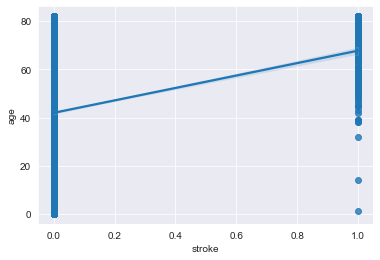

In [109]:
sns.regplot(x='stroke',y='age',data=data)

In [110]:
pd.DataFrame(confusion_matrix(y_test,predict3),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,1609,0
Actual Yes,76,1


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

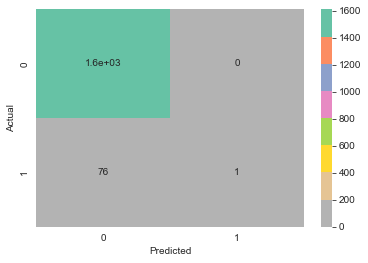

In [111]:
confusion_matrix = pd.crosstab(y_test, predict3, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True , cmap='Set2_r')

# KNN

In [112]:
model4=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
model4.fit(x_train,y_train)
predict4=model4.predict(x_test)  #Testing
KNN=print('Acuuracy=',accuracy_score(predict4,y_test))
KNN

Acuuracy= 0.9543297746144721


In [113]:
n_neighbors=20
scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    predict4=model4.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(predict4,y_test),2))
    scores.append(round(accuracy_score(predict4,y_test),2))

Accuracy for k= 1 is: 0.95
Accuracy for k= 2 is: 0.95
Accuracy for k= 3 is: 0.95
Accuracy for k= 4 is: 0.95
Accuracy for k= 5 is: 0.95
Accuracy for k= 6 is: 0.95
Accuracy for k= 7 is: 0.95
Accuracy for k= 8 is: 0.95
Accuracy for k= 9 is: 0.95
Accuracy for k= 10 is: 0.95
Accuracy for k= 11 is: 0.95
Accuracy for k= 12 is: 0.95
Accuracy for k= 13 is: 0.95
Accuracy for k= 14 is: 0.95
Accuracy for k= 15 is: 0.95
Accuracy for k= 16 is: 0.95
Accuracy for k= 17 is: 0.95
Accuracy for k= 18 is: 0.95
Accuracy for k= 19 is: 0.95


# Decision Tree

In [114]:
model5=DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,max_features=4)
model5.fit(x_train,y_train)
predict5=model5.predict(x_test)
DT=print('Accuracy score:',metrics.accuracy_score(predict5,y_test))
DT

Accuracy score: 0.9543297746144721


# Random Forest Classifier

In [115]:
model6=RandomForestClassifier(n_estimators=100)
model6.fit(x_train,y_train)
predict6=model6.predict(x_test)
RFC=print('The accuracy of the Random Forests is',metrics.accuracy_score(predict6,y_test))
RFC

The accuracy of the Random Forests is 0.9543297746144721


# GaussianNB

In [116]:
model7=GaussianNB()
model7.fit(x_train,y_train)
predict7=model7.predict(x_test)
GNB=print('The accuracy of the NaiveBayes is',metrics.accuracy_score(predict7,y_test))
GNB

The accuracy of the NaiveBayes is 0.8742586002372479


# K-Fold Cross Validation

In [117]:
accuracies = cross_val_score(estimator = model5, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.83 %
Standard Deviation: 0.32 %


# All Training and Testing Accuracy Results 

In [118]:
print("Training data accuracy of Radial Support Vector:", model0.score(x_train, y_train))
print("Testing data accuracy of Radial Support Vector", model0.score(x_test, y_test))

print("Training data accuracy of Linear Support Vector:", model1.score(x_train, y_train))
print("Testing data accuracy of Linear Support Vector:", model1.score(x_test, y_test))

print("Training data accuracy of Logistic Regression:", model3.score(x_train, y_train))
print("Testing data accuracy of Logistic Regression:", model3.score(x_test, y_test))

print("Training data accuracy of KNN:", model4.score(x_train, y_train))
print("Testing data accuracy ofKNN:", model4.score(x_test, y_test))

print("Training data accuracy of Decision Tree:", model5.score(x_train, y_train))
print("Testing data accuracy of Decision Tree:", model5.score(x_test, y_test))

print("Training data accuracy of Random Forest Classifier:", model6.score(x_train, y_train))
print("Testing data accuracy of Random Forest Classifier:", model6.score(x_test, y_test))

print("Training data accuracy of GaussianNB:", model7.score(x_train, y_train))
print("Testing data accuracy of GaussianNB:", model7.score(x_test, y_test))

Training data accuracy of Radial Support Vector: 0.9503359626059013
Testing data accuracy of Radial Support Vector 0.9543297746144721
Training data accuracy of Linear Support Vector: 0.9497516798130295
Testing data accuracy of Linear Support Vector: 0.9543297746144721
Training data accuracy of Logistic Regression: 0.9497516798130295
Testing data accuracy of Logistic Regression: 0.9549228944246738
Training data accuracy of KNN: 0.9497516798130295
Testing data accuracy ofKNN: 0.9543297746144721
Training data accuracy of Decision Tree: 0.9497516798130295
Testing data accuracy of Decision Tree: 0.9543297746144721
Training data accuracy of Random Forest Classifier: 1.0
Testing data accuracy of Random Forest Classifier: 0.9543297746144721
Training data accuracy of GaussianNB: 0.8717499269646509
Testing data accuracy of GaussianNB: 0.8742586002372479


# Training and Testing data Accuracy Visualization

C:\Users\nagham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



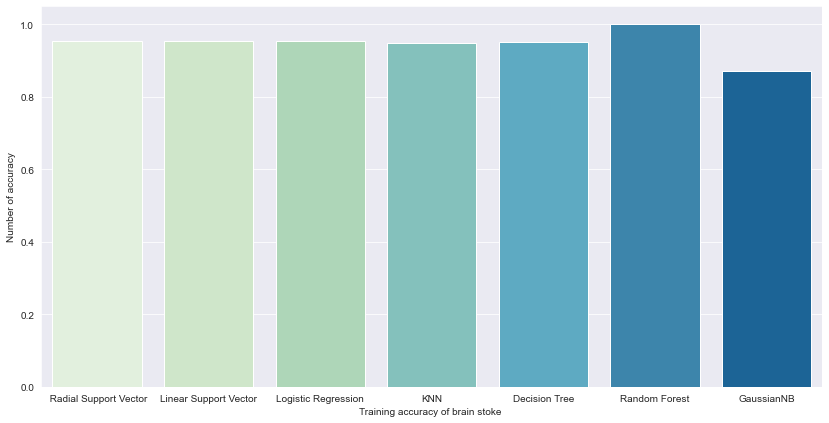

In [119]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,7))
x = [' Radial Support Vector', 'Linear Support Vector', 'Logistic Regression',"KNN","Decision Tree","Random Forest","GaussianNB"]
y = [0.9543297746144721, 0.9543297746144721, 0.9549228944246738, 0.9497516798130295,0.9503359626059013,1.0,0.8717499269646509]
plt.xlabel('Training accuracy of brain stoke ')
plt.ylabel('Number of accuracy')
sns.barplot(x, y, palette = 'GnBu')
plt.show()

C:\Users\nagham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



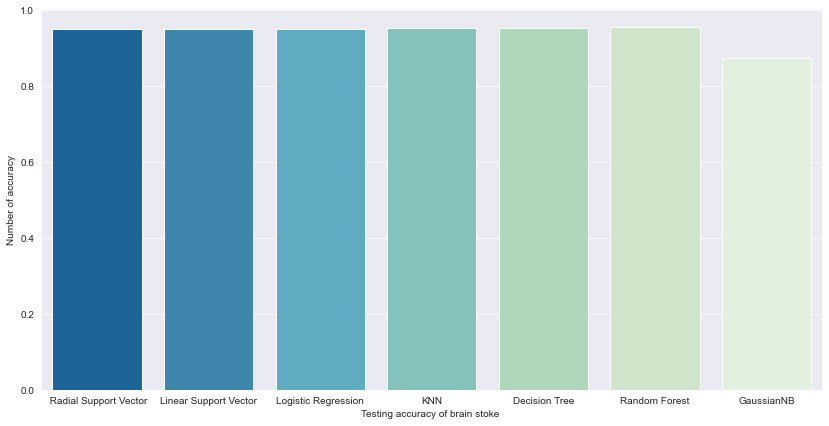

In [120]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,7))
x = [' Radial Support Vector', 'Linear Support Vector', 'Logistic Regression',"KNN","Decision Tree","Random Forest","GaussianNB"]
y = [ 0.9503359626059013,0.9497516798130295, 0.9497516798130295, 0.9543297746144721,0.9537366548042705,0.9549228944246738,0.8742586002372479]
plt.xlabel('Testing accuracy of brain stoke ')
plt.ylabel('Number of accuracy')
sns.barplot(x, y, palette = 'GnBu_r')
plt.show()

Training accuracy and Testing accuracy are pretty close to each other

All the models giving some good accuracy

After the analysis and prediction, we come up with following insights that describes how different characteristics than can effect Brain Strokes and how it is different from pateints with no Brain Stroke.

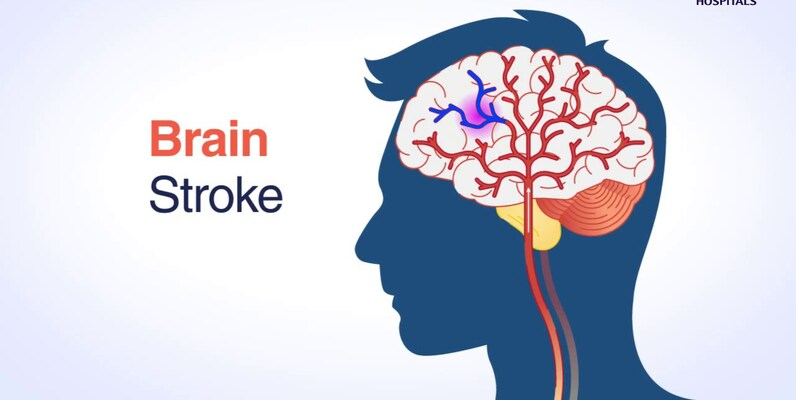

# The End 